In [278]:
import numpy as np
import uproot as up
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.mlab as mlab
from scipy.stats import norm
import pylandau

#### First, open the root file with uproot and save the times to a Numpy Array

In [296]:
# events = up.open("/cwork/rck32/eic/work_eic/root_files/time_res/one_segment/mu_5GeV_2000events_2m_1cm_3cm.edm4hep.root:events")
# events = up.open("/cwork/rck32/eic/work_eic/root_files/time_res/one_segment/pi_5GeV_10000events_1_5m_1cm_3cm.edm4hep.root:events")
events = up.open("/cwork/rck32/eic/work_eic/root_files/time_res/one_segment/mu_5GeV_10000events_2_5m_1cm_3cm.edm4hep.root:events")
# events = up.open("/cwork/rck32/eic/work_eic/root_files/time_res/one_layer/mu_5GeV_500_2m_1cm_3cm_one_layer.edm4hep.root:events")

times = events["HcalBarrelHits/HcalBarrelHits.time"].array(library='np')

#### Now we can loop over all events with the first index of the array and cut events with <2 optical photons
Goal: skip events with only 1 hit (noise) and search remaining events for first photon, ie photon with lowest time. Take that time 

In [297]:
accepted_times = []

In [298]:
#Note - array.shape[0] gives the first dimension of the array
for event_num in range(times.shape[0]):
    if(times[event_num].shape[0] < 2): continue
    accepted_times.append(min(times[event_num]))

#### We can plot the times in a histogram to visualize the result

#### Now we need to calculate the standard deviation and mean of this distribution

resolution (sigma): 0.803 | mean: 14.06 | FWHM: 1.886


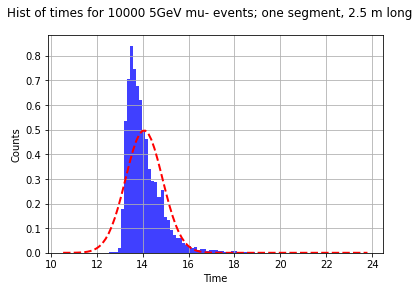

In [299]:
fig, axs = plot.subplots(1, 1)

(mu, sigma) = norm.fit(accepted_times)
n, bins, patches = plot.hist(accepted_times, 100, facecolor='blue', alpha=0.75, density=True)
fig.suptitle("Hist of times for 10000 5GeV mu- events; one segment, 2.5 m long")

y = norm.pdf( bins, mu, sigma)
l = axs.plot(bins, y, 'r--', linewidth=2)
axs.set_xlabel('Time')
axs.set_ylabel('Counts')
axs.grid(True)

fig.show()
fig.savefig("plots/mu_5GeV_2_5m.svg")
print("resolution (sigma): %4.3f | mean: %4.2f | FWHM: %4.3f" %(sigma,mu,(2.35 * sigma)))

In [289]:
counts = []
counts_cut = []
for i in range(times.shape[0]):
    count = len(times[i])
    counts.append(len(times[i]))
    if(count > 35 or count < 2):continue
    counts_cut.append(len(times[i]))

Mean: 9.98 | Sigma: 28.876


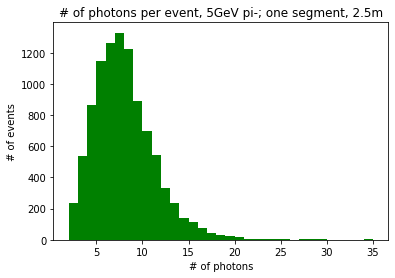

In [294]:
(mu, sigma) = norm.fit(counts)
n, bins, patches = plot.hist(counts_cut, bins=33, density = False,facecolor = "green")
plot.title("# of photons per event, 5GeV pi-; one segment, 2.5m")
plot.xlabel("# of photons")
plot.ylabel("# of events")
plot.plot
plot.savefig("plots/counts/pi_5GeV_2_5m.svg")
print("Mean: %4.2f | Sigma: %4.3f"%(mu,sigma))

In [295]:
bins

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35.])